In [1]:
import numpy as np
import pandas
import matplotlib.pyplot as plt

from keras import layers, optimizers, models
from sklearn.preprocessing import LabelEncoder, MinMaxScaler

from sklearn.tree import DecisionTreeClassifier # Import Decision Tree Classifier
from sklearn.model_selection import train_test_split # Import train_test_split function
from sklearn import metrics #Import scikit-learn metrics module for accuracy calculation

Using TensorFlow backend.


In [2]:
from IPython.display import Markdown, display
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc
import numpy as np
from sklearn import metrics



def printmd(string):
    display(Markdown(string))
    
    
from sklearn.linear_model import LogisticRegression
from sklearn import svm
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.model_selection import cross_val_score

from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize


In [3]:
data = pandas.read_csv("car.data", encoding="UTF-8", header=None)
data

,0,1,2,3,4,5,6
0,vhigh,vhigh,2,2,small,low,unacc
1,vhigh,vhigh,2,2,small,med,unacc
2,vhigh,vhigh,2,2,small,high,unacc
3,vhigh,vhigh,2,2,med,low,unacc
4,vhigh,vhigh,2,2,med,med,unacc
...,...,...,...,...,...,...,...
1723,low,low,5more,more,med,med,good
1724,low,low,5more,more,med,high,vgood
1725,low,low,5more,more,big,low,unacc
1726,low,low,5more,more,big,med,good


In [4]:
data = data.replace(' ?', np.nan)
data = data.dropna()

In [5]:
le=LabelEncoder()
for i in data.columns:
    data[i]=le.fit_transform(data[i])
data

,0,1,2,3,4,5,6
0,3,3,0,0,2,1,2
1,3,3,0,0,2,2,2
2,3,3,0,0,2,0,2
3,3,3,0,0,1,1,2
4,3,3,0,0,1,2,2
...,...,...,...,...,...,...,...
1723,1,1,3,2,1,2,1
1724,1,1,3,2,1,0,3
1725,1,1,3,2,0,1,2
1726,1,1,3,2,0,2,1


In [6]:
X=data[data.columns[:-1]]
y=data[data.columns[-1:]]

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [8]:
min_max_scaler = MinMaxScaler()
np_scaled = min_max_scaler.fit_transform(X_train)
data_norm= pandas.DataFrame(np_scaled)
X_train = data_norm.to_numpy()

min_max_scaler = MinMaxScaler()
np_scaled = min_max_scaler.fit_transform(X_test)
data_norm= pandas.DataFrame(np_scaled)
X_test = data_norm.to_numpy()

# min_max_scaler = MinMaxScaler()
# np_scaled = min_max_scaler.fit_transform(y_train)
# data_norm= pandas.DataFrame(np_scaled)
# y_train = data_norm.to_numpy()

# min_max_scaler = MinMaxScaler()
# np_scaled = min_max_scaler.fit_transform(y_test)
# data_norm= pandas.DataFrame(np_scaled)
# y_test = data_norm.to_numpy()

In [9]:
y_train

,6
1178,3
585,2
1552,0
1169,2
1033,2
...,...
1130,3
1294,1
860,0
1459,2


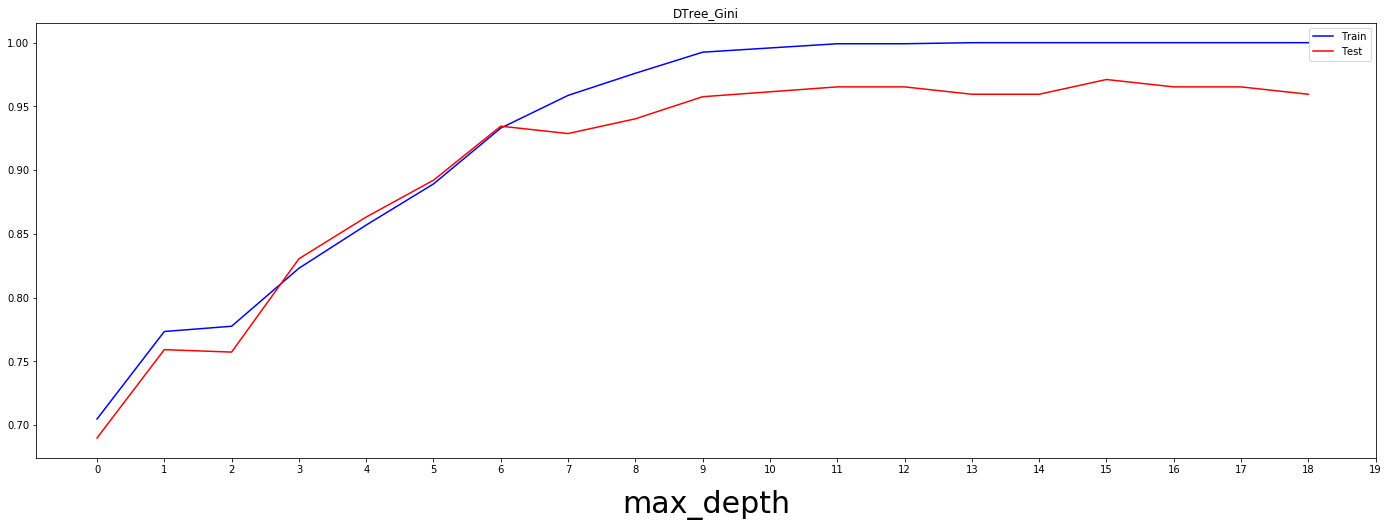

Best test Accuracy: 0.9710982658959537




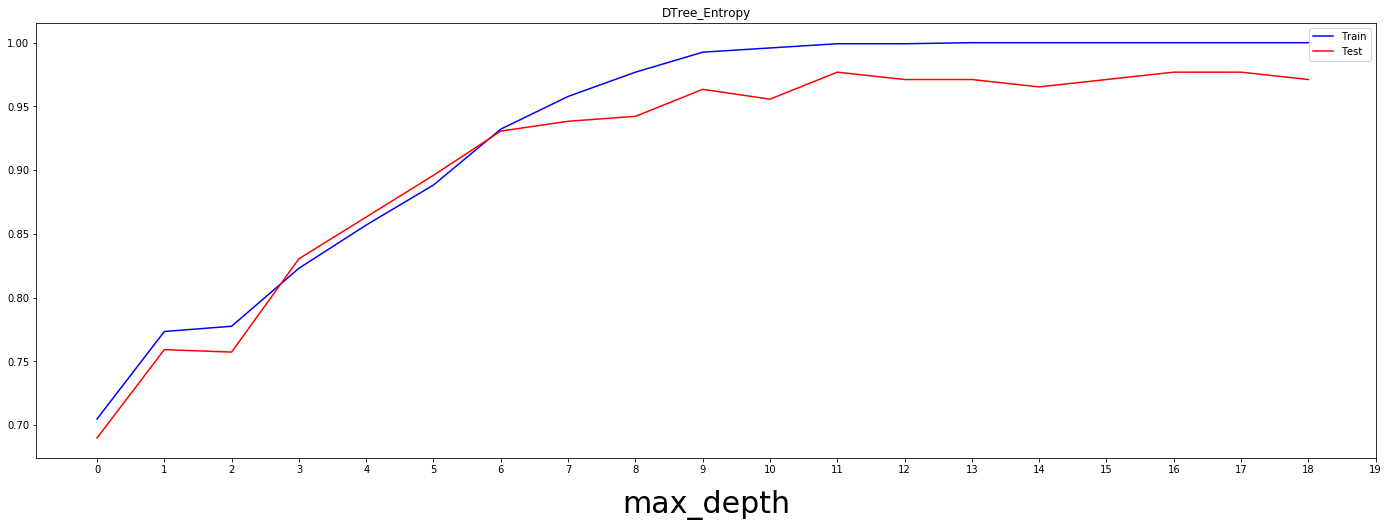

Best test Accuracy: 0.976878612716763


In [10]:
# Gini
GList_train=[]
GList_test=[]
for max_depth in range(1, 20):
    clf_gini = tree.DecisionTreeClassifier(criterion = 'gini',max_depth = max_depth)
    clf_gini = clf_gini.fit(X_train, y_train)
    
#     print("Max depth: ",max_depth)
    clf_gini_pred = clf_gini.predict(X_train)
    train_acc = metrics.accuracy_score(y_train, clf_gini_pred)
    GList_train.append(train_acc)
#     print("Train Gini Accuracy:",train_acc)
    
    clf_gini_pred = clf_gini.predict(X_test)
    test_acc = metrics.accuracy_score(y_test, clf_gini_pred)
    GList_test.append(test_acc)
#     print("Test Gini Accuracy:",test_acc)

plt.figure(figsize=(24, 8))
orig = plt.plot(GList_train, color='blue',label='Train')
predict = plt.plot(GList_test, color='red',label='Test')
plt.xlabel("max_depth", fontsize=30, labelpad = 15)
plt.legend(loc='best')
plt.xticks(range(0,20))#十天一刻度
plt.title('DTree_Gini')
plt.show(block=False)
print('Best test Accuracy:',max(GList_test))
# DTree_Gini = model_eval(y_test, clf_gini_pred)
# print('Desicion Tree using Gini Index : %.2f percent.' % (round(DTree_Gini['accuracy']*100,2)))
print('\n')

# Entropy
EList_train=[]
EList_test=[]
for max_depth in range(1, 20):
    clf_entropy = tree.DecisionTreeClassifier(criterion = 'entropy', max_depth=max_depth)
    clf_entropy = clf_entropy.fit(X_train, y_train)
    
#     print("Max depth: ",max_depth)
    clf_entropy_pred = clf_entropy.predict(X_train)
    train_acc = metrics.accuracy_score(y_train, clf_entropy_pred)
    EList_train.append(train_acc)
#     print("Train Entropy Accuracy:",train_acc)
    
    clf_entropy_pred = clf_entropy.predict(X_test)
    test_acc = metrics.accuracy_score(y_test, clf_entropy_pred)
    EList_test.append(test_acc)
    
plt.figure(figsize=(24, 8))
orig = plt.plot(EList_train, color='blue',label='Train')
predict = plt.plot(EList_test, color='red',label='Test')
plt.xlabel("max_depth", fontsize=30, labelpad = 15)
plt.legend(loc='best')
plt.xticks(range(0,20))#十天一刻度
plt.title('DTree_Entropy')
plt.show(block=False)
print('Best test Accuracy:',max(EList_test))
#     print("Test Entropy Accuracy:",test_acc)
# DTree_Entropy = model_eval(y_test, clf_entropy_pred)
# print('Desicion Tree using Entropy : %.2f percent.' % (round(DTree_Entropy['accuracy']*100,2)))

#printmd('### 3.1.2. Model Evaulation ')
# ovl_dtree = round(pd.DataFrame([DTree_Entropy, DTree_Gini], index = ['DTree_Entropy','DTree_Gini']),4)
# display(ovl_dtree)

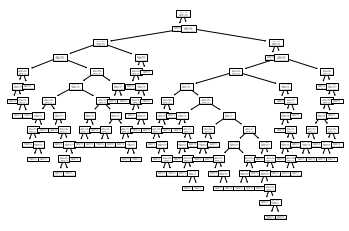

In [12]:
tree.plot_tree(clf_gini);

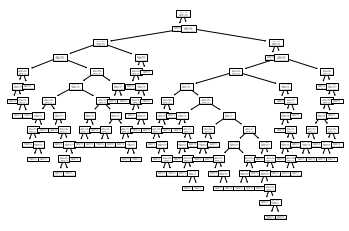

In [13]:
tree.plot_tree(clf_entropy);